# Taylor models + NNs: Proof of concept

In [38]:
using TaylorModels

## Set-up

In [39]:
set_variables("x y", order=8)

2-element Array{TaylorN{Float64},1}:
  1.0 x + 𝒪(‖x‖⁹)
  1.0 y + 𝒪(‖x‖⁹)

In [40]:
x0 = IntervalBox(0..0, 2)

[0, 0] × [0, 0]

In [41]:
dom = IntervalBox(-0.25 .. 0.25, 2)

[-0.25, 0.25] × [-0.25, 0.25]

In [42]:
xm = TaylorModelN(1, 3, x0, dom)
ym = TaylorModelN(2, 3, x0, dom)
xm, ym

( [1, 1] x + [0, 0],  [1, 1] y + [0, 0])

## `relu`

In [43]:
relu(x) = x ≤ 0 ? zero(x) : x

relu (generic function with 1 method)

In [44]:
relu(1 .. 1), relu(-1 .. 0), relu(-1..1)

([1, 1], [0, 0], [-1, 1])

In [45]:
relu.((-1 .. 0.3) × (-1 .. 1))

[-1, 0.300001] × [-1, 1]

##  Naive implementation of TMs+NN

In [46]:
A = randn(6,2)
b = randn(6);

In [47]:
nnm = A*[xm,ym]+b

6-element Array{TaylorModelN{2,IntervalArithmetic.Interval{Float64},Float64},1}:
      [1.04049, 1.0405] + [-0.0638335, -0.0638334] x + [0.231514, 0.231515] y + [0, 0]
     [-1.30876, -1.30875] + [-1.12945, -1.12944] x + [-0.285676, -0.285675] y + [0, 0]
  [-0.599847, -0.599846] + [-0.418431, -0.41843] x + [0.0750894, 0.0750895] y + [0, 0]
         [0.576357, 0.576358] + [0.296328, 0.296329] x + [1.42473, 1.42474] y + [0, 0]
        [1.22081, 1.22082] + [0.256141, 0.256142] x + [-0.55272, -0.552719] y + [0, 0]
     [0.875587, 0.875588] + [-0.334945, -0.334944] x + [0.489846, 0.489847] y + [0, 0]

In [48]:
range_nnm = evaluate(nnm, dom)

LoadError: [91mUndefVarError: evaluate not defined[39m

In [49]:
relu.(range_nnm)

LoadError: [91mUndefVarError: range_nnm not defined[39m

In [50]:
function relu(x::TaylorModelN)
    dom = domain(x)
    range = evaluate(x, dom)
    @show(range)  # Show computed range, to check consistency
    relu(range) ≤ 0 && return (zero(x))
    return x # <<
end

relu (generic function with 2 methods)

In [51]:
relu.(nnm)

LoadError: [91mUndefVarError: evaluate not defined[39m

## Same thing, with nonlinearities

In [52]:
nnm = A*[cos(xm),sin(ym)]+b

6-element Array{TaylorModelN{2,IntervalArithmetic.Interval{Float64},Float64},1}:
  [0.976664, 0.976665] + [0.231514, 0.231515] y + [0.0319167, 0.0319168] x² + [-0.0385859, -0.0385858] y³ + [-1.96905e-05, 9.32255e-06]
      [-2.4382, -2.43819] + [-0.285676, -0.285675] y + [0.564722, 0.564723] x² + [0.0476126, 0.0476127] y³ + [-0.00019495, 1.15035e-05]
    [-1.01828, -1.01827] + [0.0750894, 0.0750895] y + [0.209215, 0.209216] x² + [-0.012515, -0.0125149] y³ + [-7.0986e-05, 3.02367e-06]
      [0.872686, 0.872687] + [1.42473, 1.42474] y + [-0.148165, -0.148164] x² + [-0.237456, -0.237455] y³ + [-5.73706e-05, 0.000105501]
      [1.47695, 1.47696] + [-0.55272, -0.552719] y + [-0.128071, -0.12807] x² + [0.0921198, 0.0921199] y³ + [-2.22567e-05, 6.38597e-05]
     [0.540642, 0.540643] + [0.489846, 0.489847] y + [0.167472, 0.167473] x² + [-0.0816412, -0.0816411] y³ + [-7.41273e-05, 1.9725e-05]

In [53]:
relu.(nnm)

LoadError: [91mUndefVarError: evaluate not defined[39m

In [54]:
using ReachabilityAnalysis, Plots

In [55]:
Z = rand(Zonotope)

T = overapproximate(Z, TaylorModelReachSet)

TaylorModelReachSet{Float64}(TaylorModel1{TaylorN{Float64},Float64}[  0.25644960976686537 + 1.8071791479853399 x₁ - 0.6980107202035731 x₂ + [0, 0],   1.6884435070916748 - 1.334814881168902 x₁ + 0.21321181789620283 x₂ + [0, 0]], [0, 0])

In [56]:
Z.center

2-element Array{Float64,1}:
 0.25644960976686365
 1.6884435070916755

In [57]:
Z.generators

2×3 Array{Float64,2}:
  0.508509  -0.690784   1.29144
 -0.375594   0.211004  -0.957014

$F(x, t) = p_0(x) + p_1(x)t + p_2(x)t^2 +...+p_k(x)t^k$

In [58]:
set(T)

2-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
   0.25644960976686537 + 1.8071791479853399 x₁ - 0.6980107202035731 x₂ + [0, 0]
    1.6884435070916748 - 1.334814881168902 x₁ + 0.21321181789620283 x₂ + [0, 0]

In [59]:
TZ = set(overapproximate(T, Zonotope));

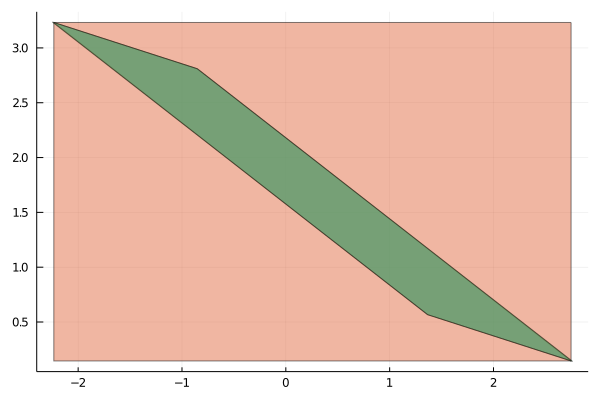

In [60]:
plot(Z)
plot!(box_approximation(Z))
plot!(TZ)

In [61]:
set(T)

2-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
   0.25644960976686537 + 1.8071791479853399 x₁ - 0.6980107202035731 x₂ + [0, 0]
    1.6884435070916748 - 1.334814881168902 x₁ + 0.21321181789620283 x₂ + [0, 0]

In [62]:
function relu(x::TaylorModel1{<:TaylorN{N}}) where N
    t0 = 0.0 # dummy
    y = TaylorModels.evaluate(x, t0)
    n = get_numvars()
    range = TaylorModels.evaluate(y, ReachabilityAnalysis.symBox(n))
    
    # completely contained in <= 0
    relu(range) ≤ 0 && return interval(0.0)
    
    # otherwise intersect with > 0
    return range ∩ (0 .. Inf)
end

relu (generic function with 3 methods)

In [63]:
nnm = A*set(T) + b
relu.(nnm)

6-element Array{IntervalArithmetic.Interval{Float64},1}:
    [0.896721, 1.93334]
 [0, 0.306496]
 [0, 0.584121]
    [1.59476, 4.5211]
 [0, 1.85058]
    [0.0193734, 3.21417]

Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T)))) = Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([1.3808197389778893, 1.6884435070916748], [1.3808197389778893, 1.548026699065105])


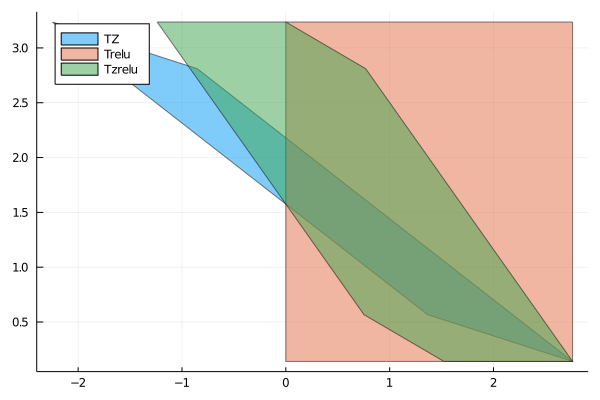

In [64]:
plot(TZ, lab="TZ")

@show Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T))))

TZrelu = overapproximate(Rectification(TZ), Zonotope) # uses AI2

plot!(Trelu, lab="Trelu", legend=:topleft)

plot!(TZrelu, lab="Tzrelu")

Another random example:

Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T)))) = Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([0.0, 0.0], [0.0, 0.0])


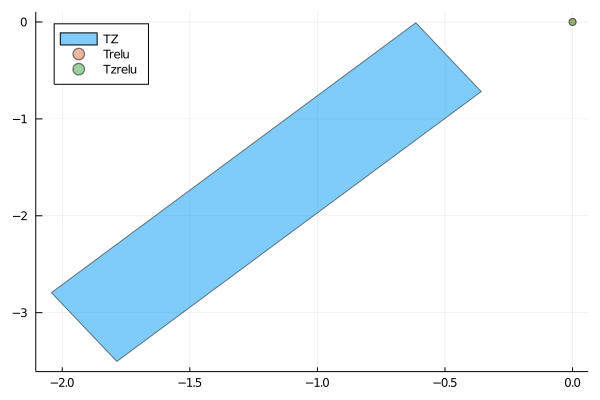

In [65]:
Z = rand(Zonotope, num_generators=2)

T = overapproximate(Z, TaylorModelReachSet)

TZ = set(overapproximate(T, Zonotope));

plot(TZ, lab="TZ")

@show Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T))))

TZrelu = overapproximate(Rectification(TZ), Zonotope) # uses AI2

plot!(Trelu, lab="Trelu", legend=:topleft)

plot!(TZrelu, lab="Tzrelu")

## Example with the TORA network

In [121]:
using NeuralNetworkAnalysis
const NNA = NeuralNetworkAnalysis
const TM = TaylorModels

TaylorModels

In [67]:
controller = NNA.read_nnet_mat("/home/sguadalupe/.julia/dev/NeuralNetworkAnalysis/models/Sherlock-Benchmark-9-TORA/controllerTora.mat", act_key="act_fcns");

In [171]:
X₀ = Hyperrectangle(low=[0.6, -0.7, -0.4, 0.5], high=[0.7, -0.6, -0.3, 0.6]);

### Ai2 Set

In [173]:
u_1 = forward_network(Ai2(), controller, X₀)
u_1 = overapproximate(u_1, NNA.Interval)

LazySets.Interval{Float64,IntervalArithmetic.Interval{Float64}}([9.79134, 10.2658])

### TM Set

In [129]:
T = overapproximate(X₀, TaylorModelReachSet)

TaylorModelReachSet{Float64}(TaylorModel1{TaylorN{Float64},Float64}[  0.6499999999999999 + 0.050000000000000044 x₁ + [0, 0],   - 0.6499999999999999 + 0.04999999999999993 x₂ + [0, 0],   - 0.35 + 0.04999999999999999 x₃ + [0, 0],   0.55 + 0.04999999999999993 x₄ + [0, 0]], [0, 0])

In [130]:
layers = controller.layers
weights = [layer.weights for layer in layers]
bias = [layer.bias for layer in layers];

In [153]:
u = set(T)
for i=1:length(layers)
    u = weights[i] * u + bias[i]
    u = relu.(u)
end

In [159]:
u = convert(NNA.Interval, u[1])

LazySets.Interval{Float64,IntervalArithmetic.Interval{Float64}}([-3.92238, 22.198])

In [168]:
u_1

LazySets.Interval{Float64,IntervalArithmetic.Interval{Float64}}([-3.92238, 22.198])

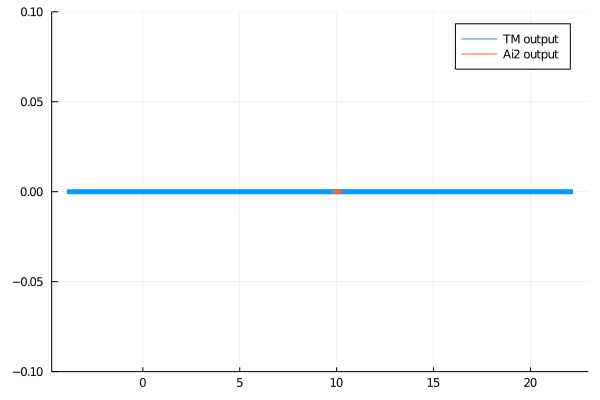

In [174]:
plot(u, lw=5, label="TM output")
plot!(u_1, lw=5, label="Ai2 output")
ylims!((-0.1, 0.1))